## LAMINI Narimene - Guettaf Sarah  - G4

# TP 5 Réseaux de neurones - Multi classification et Propagation en avant
Dans ce TP, nous aimerions faire une classification multiclasse. Pour ce faire, nous allons comparer entre une classification utilisant la regression logistique, et une classification en utilisant les réseaux de neurones.

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2 
import numpy

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [29]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [30]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [31]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


In [32]:
print(y)

[[0.]
 [0.]
 [0.]
 ...
 [9.]
 [9.]
 [9.]]


Visualisation aléatoire de quelques données

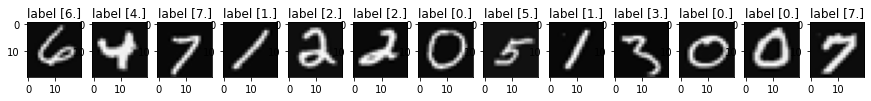

In [33]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

# Partie 1, régression logistique
Dans cette partie, nous aimerions utiliser la régression logistique pour classifier nos images

Rappelons que la régression logistique nous donne la probabilité d'appartenance (oui ou non) à la classe 1 (elle permet une classification binaire).

Pour étendre la régression logistique à une multi-classification, nous allons utiliser une stratégie 1 contre tous.

Nous paramètres $\theta$ seront donc une matrice avec un nombre de lignes égale au nombre de classes, et avec un nombre de colones égale au nombre decaractéristiques (chaque ligne de la matrice $\theta$ correspond aux paramètres d'un classifieur.

In [34]:
def sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1 / (1 + np.exp(-z))

In [35]:
def computeCost(X, y, theta):
    
    z = np.dot(X,theta)
    first = y.T.dot(np.log(sigmoid(z)))
    second = ((1-y).T).dot(np.log(1-sigmoid(z)))
    cost = -((first + second))/len(y) 
 
    return  cost

In [36]:
def lrCostFunction (X, y, theta, alpha,iterations):
    # dans cette fonction vous devez appliquer la regression logistique avec tout ce que ceci implique
    # calcul du coût, minimisation du coût avec descente du gradient, et retour des paramètres theta pour une classe
    length = len(y)
    temp = np.zeros((iterations,1))
    for i in range(iterations):
        theta = theta - (alpha/length) * np.dot(X.T, np.dot(X, theta)-y.reshape((length,1)))
        temp[i] = computeCost(X,y,theta)
    cost = temp

    return theta


In [37]:
def predictOneVsAll (all_theta, X):
    # ici en utilisant les paramètres calculés par la régression logisitique, 
    # nous aiemrions retourner les etiquettes predites
    # Ici chaque classifieur retournera de probabilité, il faudra choisir 
    # la probabilité maximale 
    # de tous les classifieurs d'un exemple donné
    # répeter pour tous les exmemples
    y_pred = np.zeros((X.shape[0],1))
    z = np.dot(all_theta,X.T) # [10,401] * [401,5000] ==> [10,5000]
    probability = sigmoid(z) 
    for i in range(X.shape[0]):
        y_pred[i] = numpy.where(probability[:,i]==numpy.amax(probability[:,i])) 
 
    return y_pred

In [12]:
classes= np.unique(y)
number_classes=classes.shape[0]
all_theta = np.zeros((number_classes, X.shape[1]));
all_theta.shape

(10, 401)

In [97]:
MaxIter= 10000
lambda_= 0.1
alpha = 0.01
# initial_theta pour chaque classifieur
initial_theta=np.zeros((X.shape[1], 1));
for i in range (number_classes):
     # appel pour chaque classifieur
    theta = lrCostFunction(X,(y==classes[i]).astype(int),initial_theta,alpha, MaxIter,);
    all_theta[i,:]=theta.T;
all_theta

array([[ 1.29077941e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -1.07057911e-04,  5.80284058e-06,  0.00000000e+00],
       [ 2.20459237e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -1.13888466e-05,  2.05623687e-06,  0.00000000e+00],
       [ 5.14102670e-02,  0.00000000e+00,  0.00000000e+00, ...,
         2.31126727e-04, -2.52663284e-05,  0.00000000e+00],
       ...,
       [ 1.33947604e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -9.82011875e-05,  1.34771265e-05,  0.00000000e+00],
       [-1.29754438e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -6.81385406e-05,  5.67474637e-06,  0.00000000e+00],
       [ 4.62695559e-02,  0.00000000e+00,  0.00000000e+00, ...,
        -3.96884205e-05,  3.73292098e-06,  0.00000000e+00]])

In [116]:
y_pred = predictOneVsAll(all_theta, X)
y_pred



<ipython-input-115-ee70627153e3>:12: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  y_pred[i] = numpy.where(probability[:,i]==numpy.amax(probability[:,i]))


array([[0.],
       [0.],
       [0.],
       ...,
       [9.],
       [9.],
       [0.]])

# Qualité du classifieur RL

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [114]:
precision = np.mean(y==y_pred)*100
precision


88.2

# Partie 2: Réseaux de neurones
Pour cette partie, nous choisissons un réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [98]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [99]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [100]:
input_layer_size  = 400;  
hidden_layer_size = 25;   
num_labels = 10;

**Prédiction**

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [101]:
def predict (W1, W2, X):
    y_pred = np.zeros((X.shape[0],1)) #5000*1
    
    z1 = np.dot(X,W1.T)
    intercept=np.ones((z1.shape[0],1))
    z1=np.column_stack((intercept,z1))
    probability_1 = sigmoid(z1) #5000*26
    
    z2 = np.dot(probability_1,W2.T)
    probability_2 = sigmoid(z2) #5000*10
   
    for i in range(X.shape[0]):
        y_pred[i] = numpy.where( probability_2[i,:]==numpy.amax( probability_2[i,:])) 
 
    return  y_pred
 

In [102]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(W1, W2, X)
y_pred
 

<ipython-input-101-f9024253e30a>:14: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  y_pred[i] = numpy.where( probability_2[i,:]==numpy.amax( probability_2[i,:]))


array([[9.],
       [9.],
       [9.],
       ...,
       [8.],
       [8.],
       [8.]])

In [104]:
precision = np.mean(y==y_pred)*100
precision

0.13999999999999999

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [105]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=1500).fit(X_train, y_train)
print(classification_report(y, y_pred))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       500
         1.0       0.00      0.00      0.00       500
         2.0       0.00      0.00      0.00       500
         3.0       0.00      0.00      0.00       500
         4.0       0.00      0.00      0.00       500
         5.0       0.01      0.01      0.01       500
         6.0       0.00      0.00      0.00       500
         7.0       0.00      0.00      0.00       500
         8.0       0.00      0.00      0.00       500
         9.0       0.01      0.01      0.01       500

    accuracy                           0.00      5000
   macro avg       0.00      0.00      0.00      5000
weighted avg       0.00      0.00      0.00      5000



# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

- Add more hidden layers to improve the performance of the neural network.

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 22 Avril 2022 à 22h


# bonne chance